# LABORATORIO 3 - Práctica 2: Clasificador de setas
---
<img src="ufv.png" width="100px" height="100px"></img> 
### Integrantes: 
* Julián Prieto Velasco   
* Guillermo Ramírez Cárdenas
* Pedro Paniagua Falo     
* Javier Muñoz Rojas

---

## **Índice**
1. [Introducción](#id0)
1. [Crea un calsificador](#id1)
1. [Dibujar el modelo](#id2)
1. [Selecciona las tres reglas que menos generalizan](#id3)
1. [Usa el clasificador para decidir sobre: Amanita Cesarea y Amanita Muscaria](#id4)

---

<div id='id0'>

## *Introducción*
---
Estamos en otoño, una época en la que muchas personas aprovechan para salir de excursión al campo los fines de  semana.  Una  de  las  actividades  más  propias  de  esta  época  es la  recogida  de  setas.  El  problema  es  que muchas de  esas personas que  se  aventuran a recogerlas no tienen las suficientes  nociones  para diferenciar una seta venenosa de una comestible. 

Es por ello que queremos construir un clasificador que nos proporcione una serie de reglas de manera que cuando una persona vaya al campo y encuentre una seta pueda saber si esta es venenosa o no. Para ello  usaremos  el  dataset  “Setas”  que  se  encuentra  en  Moodle:  mushroom.csv  tendrá  la  información necesaria para entrenar y evaluar el modelo e info.txt la equivalencia a las etiquetas usadas en el dataset. La primera columna es la que indica si una seta es venenosa o no. 

Elige el clasificador que más se adapte de entre los vistos en clase y usa scikit-learn junto con las librerías que necesites para resolver las siguientes cuestiones.

---

### Importar Librerías
---

In [102]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

### Leemos el fichero mushrooms.csv
---

In [103]:
# cargar los datos
data = pd.read_csv("Recursos Lab3\Recursos Lab3\Setas\mushrooms.csv")

data.head(5)

,Venenosa,Sombrero_forma,Sombrero_superficie,Sombrero_color,Moretones,Olor,Laminas_colocacion,Laminas_esparcimiento,Laminas_tamaño,Laminas_color,...,Tallo_debajo_superficie,Tallo_color1,Tallo_color2,Velo_tipo,Velo_color,Anillo_numero,Anillo_tipo,Esporas_color,Poblacion,Habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 1 - Crea un clasificador en el que uses al menos dos criterios de división distintos. Calcula el error en cada uno de ellos y elige el qué mejor clasifique.
---

-**Vamos a separar la variable objetivo (la primera columna), si es venenosa o no la seta**-

Para crear un clasificador, es necesario definir qué variable se quiere predecir. En este caso, la variable objetivo es si una muestra es venenosa o no (p o e). Para crear el clasificador, utilizaremos el algoritmo de aprendizaje supervisado, ***un árbol de decisión***. Con dos criterios diferentes 'GINI' Y 'ENTROPÍA'. 

Utilizando los algoritmos CART(Hunt + GINI) e ID3(Hunt + ENTROPY)

Dividiremos los datos en dos conjuntos (entrenamiento y prueba) y realizaremos "la función cross_val_score" para realizar validación cruzada con 5 pliegues en ambos clasificadores. Se calcula la precisión promedio en validación cruzada para cada clasificador y se compara para determinar cuál es el mejor clasificador. Esto permite obtener una evaluación más confiable del rendimiento de los modelos, ya que se utiliza una validación cruzada en lugar de un solo conjunto de prueba.

**Nota:** no incluimos una etapa explícita de normalización de datos ya que se utiliza la función pd.get_dummies() para realizar la codificación one-hot de las columnas categóricas.Por lo tanto no es necesario realizar una normalización adicional, ya que pd.get_dummies() crea variables binarias (0 o 1) para cada categoría, lo cual es una forma de normalización.

In [104]:
#Realizamos una copia del para evitar modificar los datos
data_copy = data.copy()
# Dividir los datos en características (X) y etiquetas (y)
X = data_copy.iloc[:, 1:] #Variables explicativas
y = data_copy.iloc[:, 0] #Variable objetivo (Venenosa)

# Convertir columnas categóricas a numéricas utilizando one-hot encoding
X_encoded = pd.get_dummies(X) 
print(X_encoded)
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2)

# Crear clasificador 1, con el algortimo Cart = (Hunt + gini) 
clfGini = DecisionTreeClassifier(criterion="gini")

# Crear clasificador 2, con el algoritmo ID3 = (Hunt + entropy)
clfENTROPY = DecisionTreeClassifier(criterion="entropy")

# Realizar validación cruzada en ambos clasificadores
scores1 = cross_val_score(clfGini, X_encoded, y, cv=5)
scores2 = cross_val_score(clfENTROPY, X_encoded, y, cv=5)

# Calcular la precisión promedio en validación cruzada para cada clasificador
mean_score1 = scores1.mean()
mean_score2 = scores2.mean()

print("Precisión promedio del clasificador 1 en validación cruzada: {:.4f}".format(mean_score1))
print("Precisión promedio del clasificador 2 en validación cruzada: {:.4f}".format(mean_score2))

# Comparar los resultados y determinar el mejor clasificador
if mean_score1 > mean_score2:
    print("El clasificador GINI es el mejor.")
else:
    print("El clasificador ENTROPIA es el mejor.")


      Sombrero_forma_b  Sombrero_forma_c  Sombrero_forma_f  Sombrero_forma_k  \
0                    0                 0                 0                 0   
1                    0                 0                 0                 0   
2                    1                 0                 0                 0   
3                    0                 0                 0                 0   
4                    0                 0                 0                 0   
...                ...               ...               ...               ...   
8119                 0                 0                 0                 1   
8120                 0                 0                 0                 0   
8121                 0                 0                 1                 0   
8122                 0                 0                 0                 1   
8123                 0                 0                 0                 0   

      Sombrero_forma_s  Sombrero_forma_

Podemos observar que el mejor modelo es el que usa el criterio de 'GINI'.

## 2 - Dibuja el modelo elegido en el punto anterior.
---

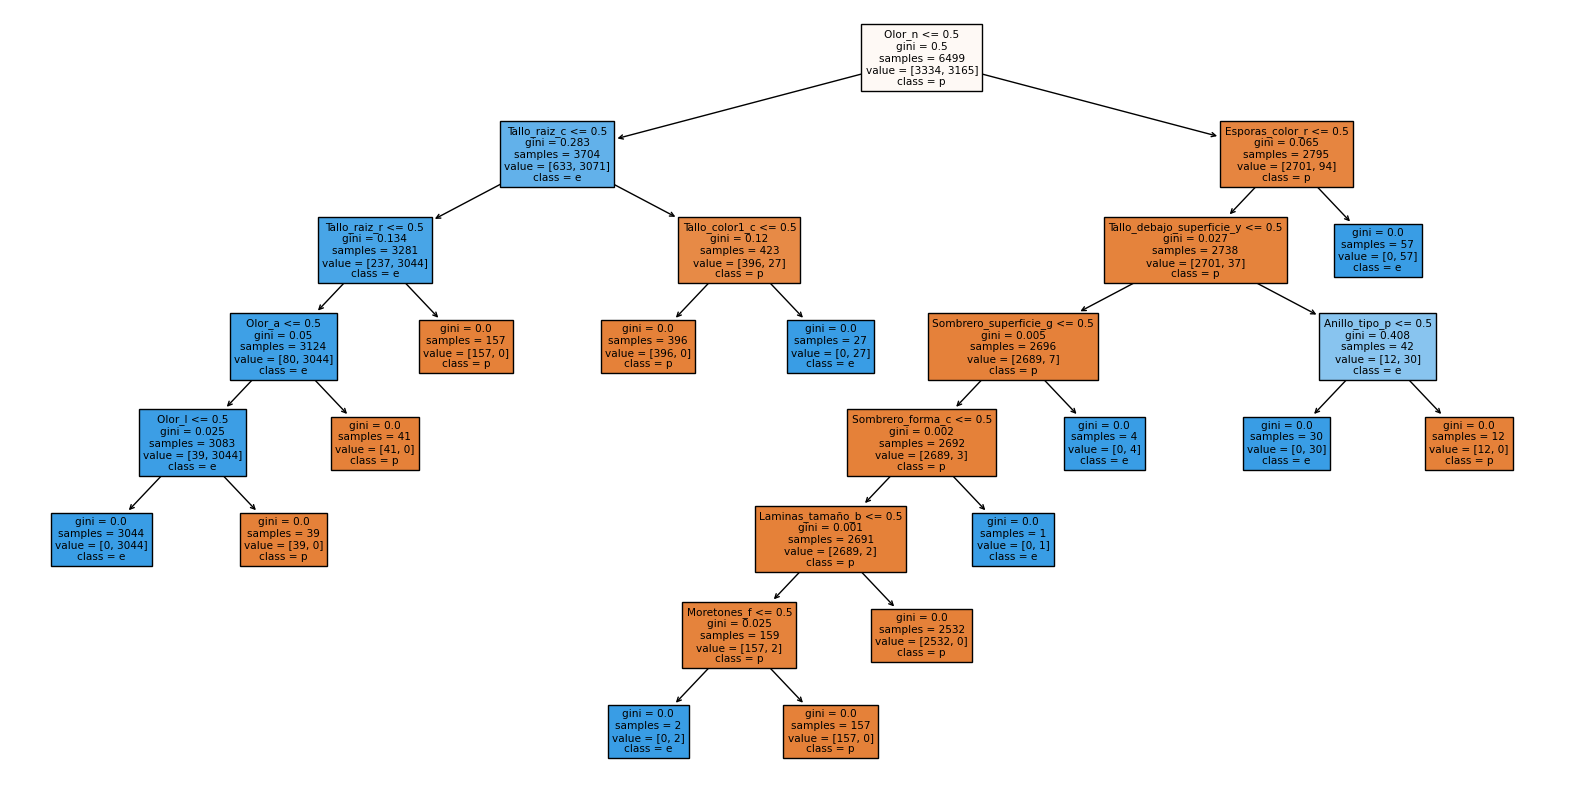

7

In [105]:
# Entrenamos el clasificador seleccionado (el mejor)
mejor =clfGini.fit(X_train, y_train)

# Visualizar el árbol de decisión
fig = plt.figure(figsize=(20, 10))
_ = tree.plot_tree(mejor, 
                   feature_names=X_encoded.columns, 
                   class_names=y.unique(), 
                   filled=True)
plt.show()

#Metodo que nos da la máxima profundidad del árbol
clfGini.get_depth()


En este árbol podemos observar que las columnas tienen caracter final que especifican que tipo es dentro de cada caracterísica:

Por ejemplo Tallo_raiz_c <= 0.5  indica que el tipo es c=club y como son datos entre 0 y 1, el 1 es que cumple la condicion y el 0 no la cumple. 

Para determinar las TRES reglas que menos generalizan buscaremos las más largas. Siguiendo eso podemos sacar estas reglas:



*Atendiendo a que los caminos derechos después de evaluar el nodo CUMPLEN la condición específica de este y los caminos izquierdos NO LA CUMPLEN, podemos determinar las siguientes reglas:*

- Si Olor_n <= 0.5 (si el olor no es nulo) y Esporas_color_r > 0.5 (si el color de las esporas es verde) y Tallo_debajo_superficie_y > 0.5 
(si el tallo debajo de la superficie es escamosa) y Sombrero_superficie_g > 0.5 (si el sombrero en la superficie tiene surcos) y Sombrero_forma_c > 0.5 (si la forma del sombrero es cóncava) y Laminas_tamaño_b > 0.5 (si el tamaño de las láminas es amplio) y 
Moretones_f <= 0.5 (si tiene moretones)
    
    ----> La seta es ***COMESTIBLE***

- Si Olor_n <= 0.5 (si el olor no es nulo) y Esporas_color_r > 0.5 (si el color de las esporas es verde) y Tallo_debajo_superficie_y > 0.5
(si el tallo debajo de la superficie es escamosa) y Sombrero_superficie_g > 0.5 (si el sombrero en la superficie tiene surcos) y Sombrero_forma_c > 0.5 (si la forma del sombrero es cóncava) y Laminas_tamaño_b > 0.5 (si el tamaño de las láminas es amplio) y 
Moretones_f > 0.5 (si no tiene moretones)
    
    ----> La seta es ***VENENOSA***

- Si Olor_n > 0.5 (si el olor es nulo) y Tallo_raiz_c > 0.5 (si el tallo de la raiz es un palo) y Tallo_raiz_r > 0.5 (si el tallo de la raiz es arraigado) y Olor_a > 0.5 (si el olor es a almendra) y Olor_l > 0.5 (si el olor es a anís) 
   
    ----> La seta es ***COMESTIBLE***



## 3 - Selecciona tres reglas que sean las que generalicen lo menos posible e interprétalas.
---

Para obtener las tres reglas que menos generalizan, tenemos que seleccionar aquellas que tengan la mayor longitud. Aunque se puede observar a primera vista, mostramos las reglas en forma de texto.

In [106]:
# Obtener las reglas de decisión del árbol entrenado
decision_rules = export_text(mejor, feature_names=list(X_encoded.columns))
print(decision_rules)

|--- Olor_n <= 0.50
|   |--- Tallo_raiz_c <= 0.50
|   |   |--- Tallo_raiz_r <= 0.50
|   |   |   |--- Olor_a <= 0.50
|   |   |   |   |--- Olor_l <= 0.50
|   |   |   |   |   |--- class: p
|   |   |   |   |--- Olor_l >  0.50
|   |   |   |   |   |--- class: e
|   |   |   |--- Olor_a >  0.50
|   |   |   |   |--- class: e
|   |   |--- Tallo_raiz_r >  0.50
|   |   |   |--- class: e
|   |--- Tallo_raiz_c >  0.50
|   |   |--- Tallo_color1_c <= 0.50
|   |   |   |--- class: e
|   |   |--- Tallo_color1_c >  0.50
|   |   |   |--- class: p
|--- Olor_n >  0.50
|   |--- Esporas_color_r <= 0.50
|   |   |--- Tallo_debajo_superficie_y <= 0.50
|   |   |   |--- Sombrero_superficie_g <= 0.50
|   |   |   |   |--- Sombrero_forma_c <= 0.50
|   |   |   |   |   |--- Laminas_tamaño_b <= 0.50
|   |   |   |   |   |   |--- Moretones_f <= 0.50
|   |   |   |   |   |   |   |--- class: p
|   |   |   |   |   |   |--- Moretones_f >  0.50
|   |   |   |   |   |   |   |--- class: e
|   |   |   |   |   |--- Laminas_tamaño_b >

---


## 4 - Usa tu clasificador para decidir si son venenos o no la “amanita muscaria”y la “amanaita cesarea”.
---
### Amatista Cesarea
<img src = "amanita_cesarea.png">


### Amatista Musicaria
<img src = "amanita_muscaria.png">

Creamos un método para aplicar One Hot Encoding a un dataframe, se utiliza pd.get_dummies() para aplicar la codificación One Hot a todas las columnas categóricas del DataFrame de entrada dataf. Luego, se utiliza MinMaxScaler para realizar la normalización Min-Max en el DataFrame codificado. Finalmente, se crea un nuevo DataFrame df_normalized que contiene los datos transformados y se retorna como resultado.

In [107]:
def oneHotToNum(dataf):
    # Aplica la codificación One Hot a todas las columnas categóricas del DataFrame
    df_encoded = pd.get_dummies(dataf)
    
    # Crea un objeto MinMaxScaler
    scaler = MinMaxScaler()
    
    # Aplica la normalización Min-Max al DataFrame
    df_normalized = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)
    
    return df_normalized

### Predicción de Amatista Cesarea

In [108]:
# Leer el archivo CSV en un DataFrame
df = pd.read_csv('Recursos Lab3\Recursos Lab3\Setas\setas_test.csv')
#Creamos copias del dataframe de base para poder utilizarlos sin tener variacion entre los casos de prueba
df_prueba1= data.copy()
df_prueba2= data.copy()
# Convertir los datos en un diccionario
cesarea_dict = df.iloc[0].to_dict()


# Crear un objeto de lista con el diccionario
cesarea = [cesarea_dict]


# Crear un DataFrame con los datos de cesarea
cesarea_df = df_prueba1.append(cesarea, ignore_index=True)

cesarea_normalized = oneHotToNum(cesarea_df)
cesarea_normalized
#Como podemos ver al visualizar el dataframe devuelto, crea dos columnas extras de Venenosa: Venenosa_e y Venenosa_p,
#así que las quitamos para que podamos hacer la prediccion
cesarea_normalized = cesarea_normalized.drop(columns='Venenosa_e')
cesarea_normalized= cesarea_normalized.drop(columns='Venenosa_p')
cesarea_normalized
#Extraemos el ultimo elemento del dataframe de variables explicativas, ya que es la seta nueva introducida anteriormente. 
ultimo_elementoC =  cesarea_normalized.tail(1)
ultimo_elementoC

#Realizamos la predicción
solucionC = clfGini.predict_proba(ultimo_elementoC)
print("Las probabilidades son: ",solucionC)

#La posicion 0 da la probabilidad de que si es venenosa y la posicion 1 da la probabilidad de que no es venenosa
if solucionC[0][0]== 1:
    print('La planta es venenosa')
else :
    print('La planta no es venenosa')


Las probabilidades son:  [[0. 1.]]
La planta no es venenosa


C:\Users\Javier Muñoz\AppData\Local\Temp\ipykernel_16936\1523296026.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cesarea_df = df_prueba1.append(cesarea, ignore_index=True)


### Predicción de Amatista Musicaria

In [109]:
# Convertir los datos en un diccionario
muscaria_dict = df.iloc[1].to_dict()

# Crear un objeto de lista con el diccionario
muscaria = [muscaria_dict]

# Crear un DataFrame con los datos de cesarea
muscaria_df = df_prueba1.append(cesarea, ignore_index=True)

muscaria_normalized = oneHotToNum(muscaria_df)
muscaria_normalized
#Como podemos ver al visualizar el dataframe devuelto, crea dos columnas extras de Venenosa: Venenosa_e y Venenosa_p,
#así que las quitamos para que podamos hacer la prediccion
muscaria_normalized = muscaria_normalized.drop(columns='Venenosa_e')
muscaria_normalized = muscaria_normalized.drop(columns='Venenosa_p')
muscaria_normalized
#Extraemos el ultimo elemento del dataframe de variables explicativas, ya que es la seta nueva introducida anteriormente. 
ultimo_elementoM =  muscaria_normalized.tail(1)
ultimo_elementoM

#Realizamos la predicción
solucionM = clfGini.predict_proba(ultimo_elementoM)
print("Las probabilidades son: ",solucionM)

#La posicion 0 da la probabilidad de que si es venenosa y la posicion 1 da la probabilidad de que no es venenosa
if solucionM[0][0]== 1:
    print('La planta es venenosa')
else :
    print('La planta no es venenosa')

Las probabilidades son:  [[0. 1.]]
La planta no es venenosa


C:\Users\Javier Muñoz\AppData\Local\Temp\ipykernel_16936\4192517004.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  muscaria_df = df_prueba1.append(cesarea, ignore_index=True)
